In [1]:
!pip install wordcloud
!pip install scikit-learn
!pip install collection
!pip install tensorflow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/millicentomondi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/millicentomondi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv("IMDB Dataset.csv")

In [4]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [5]:
df.shape

(50000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

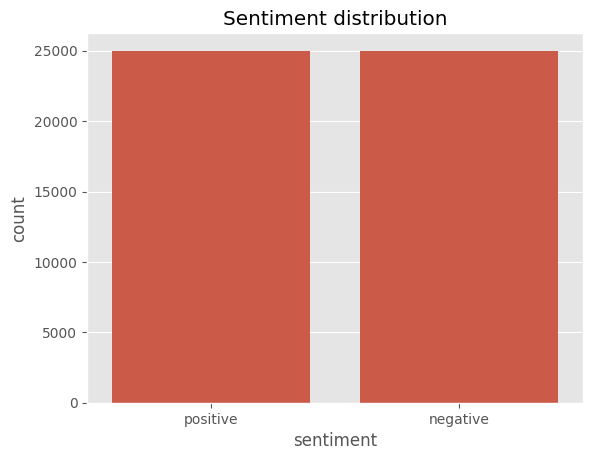

In [7]:
sns.countplot(x = 'sentiment',data = df)
plt.title("Sentiment distribution")

In [8]:
for i in range(5):
    print("Review: ",[i])
    print(df['review'].iloc[i],"\n")
    print("Sentiment: ", df['sentiment'].iloc[i],"\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [9]:
# Number of words in each review
def no_words(text):
    words = text.split()
    word_count = len(words)
    return word_count


In [10]:
df['word count'] = df['review'].apply(no_words)

In [11]:
df.head()

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'],label='Positive', color = 'blue',rwidth = 0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'],label='Negative', color = 'red',rwidth = 0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()


In [13]:
#visualize length of positive and negative reviews
df.sentiment.replace("positive",0,inplace = True)
df.sentiment.replace("negative", 1, inplace = True)

/var/folders/p4/4lg_8y350fggjngsjl12xych0000gn/T/ipykernel_20628/2864011678.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentiment.replace("positive",0,inplace = True)
/var/folders/p4/4lg_8y350fggjngsjl12xych0000gn/T/ipykernel_20628/2864011678.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [14]:
df.head()

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          0         307
1  A wonderful little production. <br /><br />The...          0         162
2  I thought this was a wonderful way to spend ti...          0         166
3  Basically there's a family where a little boy ...          1         138
4  Petter Mattei's "Love in the Time of Money" is...          0         230

In [15]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+",'',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]', '',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [16]:
df.review = df['review'].apply(data_processing)

In [17]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [18]:
#remove the duplicate reviews
df = df.drop_duplicates('review')

In [19]:
#Stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
df.review = df['review'].apply(lambda x: stemming(x))

In [21]:
#Apply word count
df['word count'] = df['review'].apply(no_words)
df.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          0         168
1  wonderful little production filming technique ...          0          84
2  thought wonderful way spend time hot summer we...          0          86
3  basically theres family little boy jake thinks...          1          67
4  petter matteis love time money visually stunni...          0         125

In [22]:
#separate -ve and +ve reviews
pos_reviews = df[df.sentiment == 0]
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          0         168
1  wonderful little production filming technique ...          0          84
2  thought wonderful way spend time hot summer we...          0          86
4  petter matteis love time money visually stunni...          0         125
5  probably alltime favorite movie story selfless...          0          58

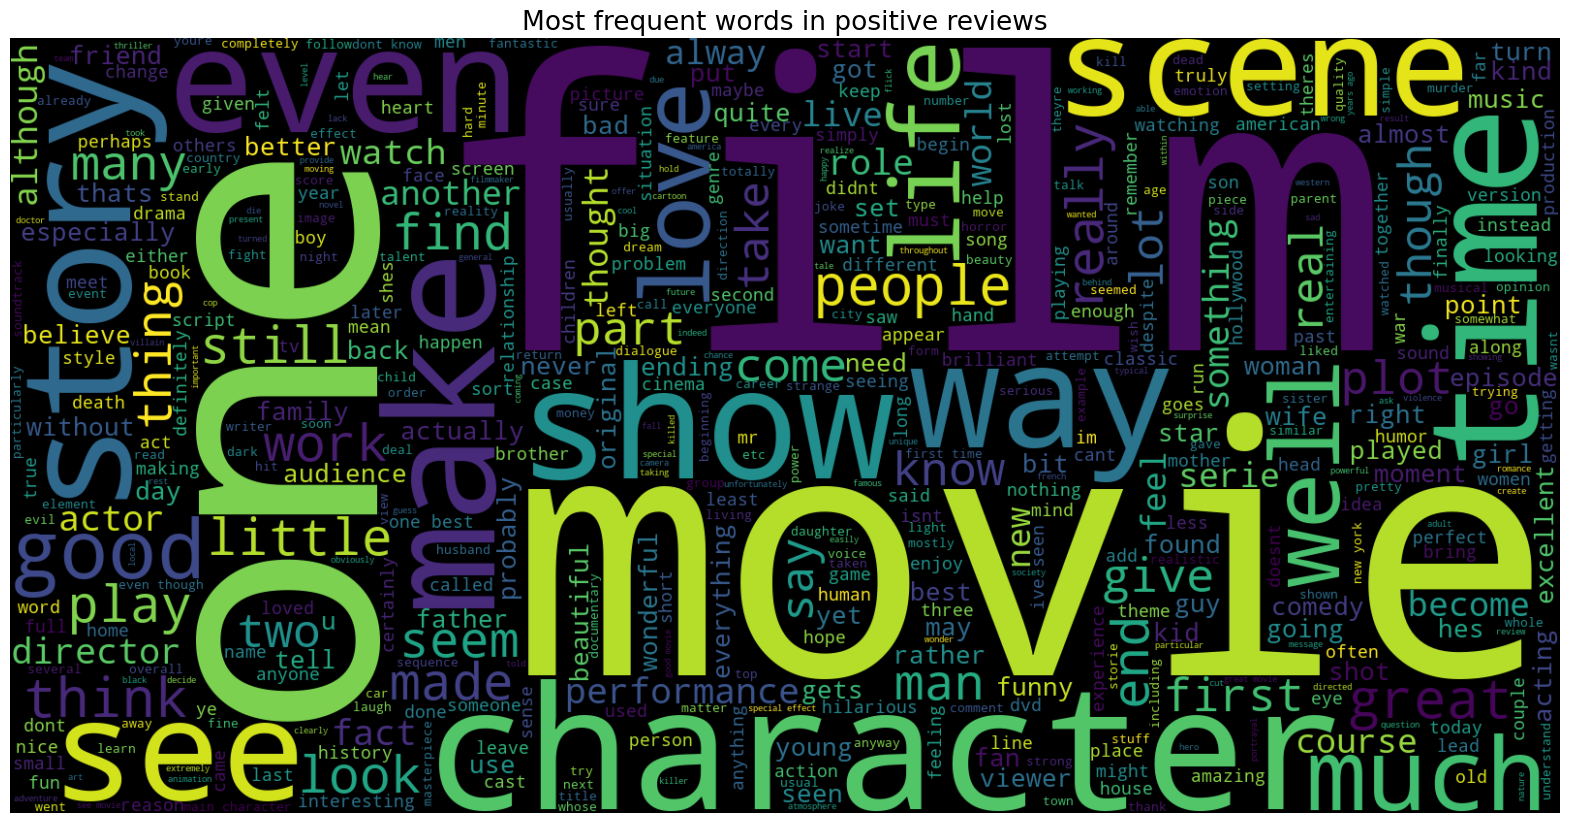

In [23]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15),facecolor = 'None')
wordcloud = WordCloud(max_words=500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews',fontsize =19)
plt.show()

In [24]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [25]:
# putting it in a dataframe
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

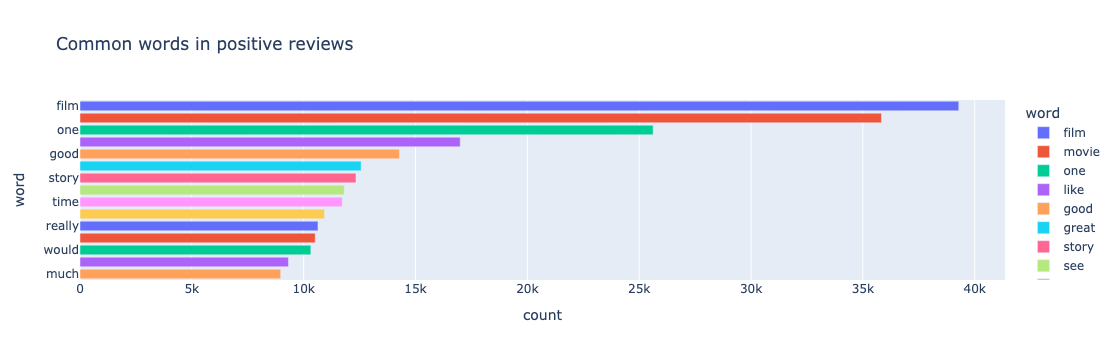

In [26]:
px.bar(pos_words, x= 'count',y = 'word', title = 'Common words in positive reviews',color = 'word')

In [27]:
# Negative reviews
neg_reviews = df[df.sentiment == 1]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          1          67
7   show amazing fresh innovative idea 70s first a...          1          83
8   encouraged positive comments film looking forw...          1          64
10  phil alien one quirky films humour based aroun...          1          51
11  saw movie 12 came recall scariest scene big bi...          1          84

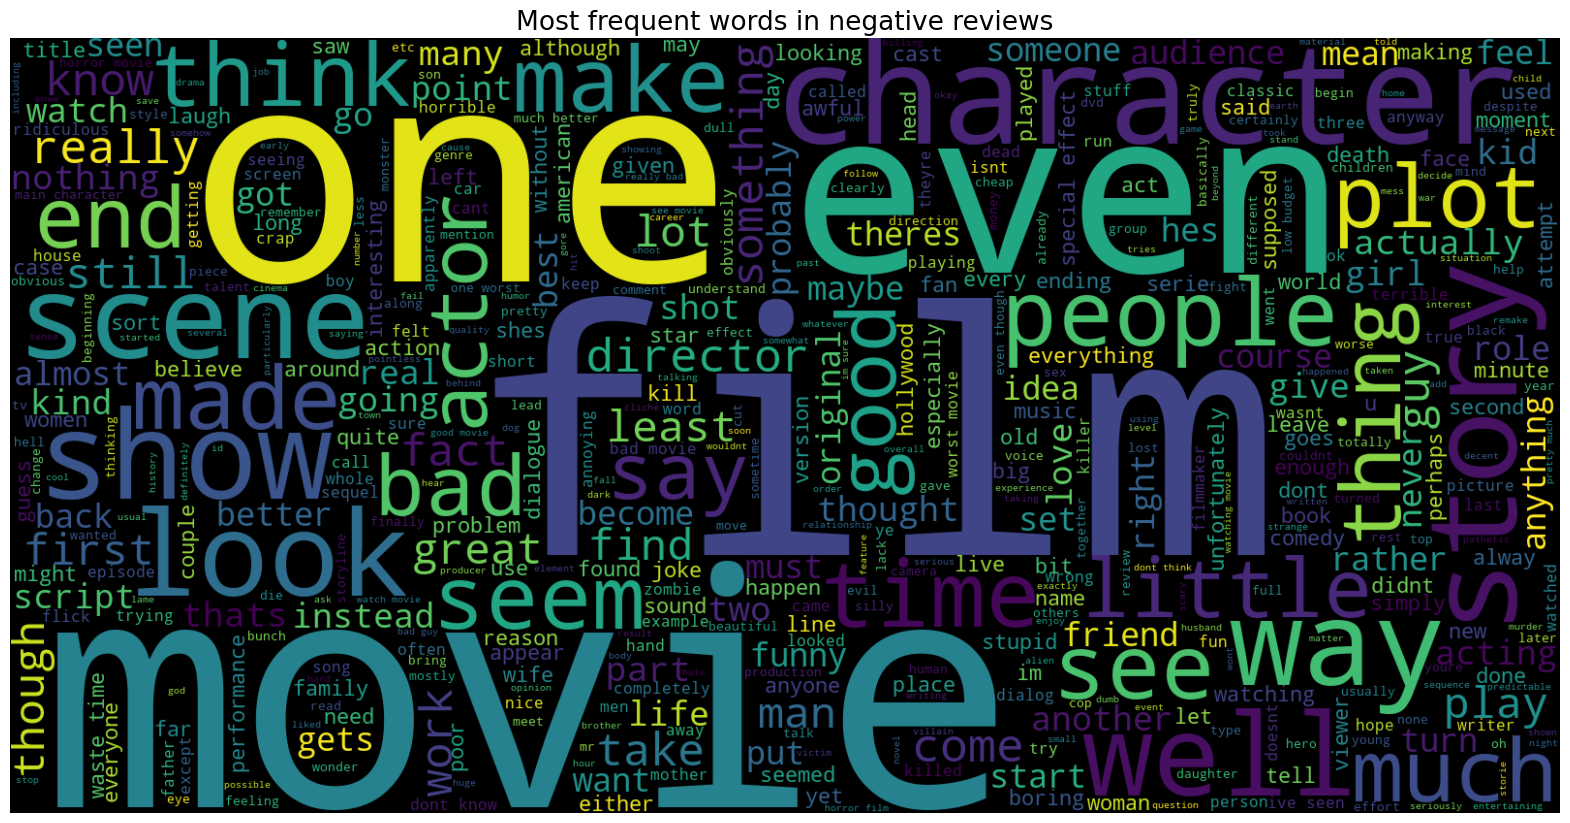

In [28]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15),facecolor = 'None')
wordcloud = WordCloud(max_words=500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews',fontsize =19)
plt.show()

In [29]:
from collections import Counter
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [30]:
# putting it in a dataframe
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

In [31]:
px.bar(neg_words, x= 'count',y = 'word', title = 'Common words in negative reviews',color = 'word')

In [32]:
X = df['review']
Y = df['sentiment']

In [33]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [35]:
print("Size of x_train: ",(x_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (34704, 221707)
Size of x_test:  (14874, 221707)
Size of y_train:  (34704,)
Size of y_test:  (14874,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Logistic regression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.06%


In [38]:
# confusion matrix and classification report
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6790  723]
 [ 904 6457]]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7513
           1       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [39]:
# Naive Bayes: MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.44%


In [40]:
# confusion matrix and classification report
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6439 1074]
 [ 943 6418]]


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7513
           1       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [41]:
# Support Vector Machine (SVM)
svm = LinearSVC()
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)
svm_acc = accuracy_score(svm_pred, y_test)
print("Test accuracy: {:.2f}%".format(svm_acc*100))

Test accuracy: 89.22%


In [42]:
# confusion matrix and classification report
print(confusion_matrix(y_test, svm_pred))
print("\n")
print(classification_report(y_test, svm_pred))

[[6766  747]
 [ 857 6504]]


              precision    recall  f1-score   support

           0       0.89      0.90      0.89      7513
           1       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [43]:
# Improving SVC by performing hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'loss':['hinge','squared_hinge']}
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.1s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.1s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.1s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.1s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.1s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.1s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.1s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.1s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.1s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   0.2s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [44]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [45]:
# Support Vector Machine (SVM)
svm = LinearSVC(C= 1, loss = 'hinge')
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)
svm_acc = accuracy_score(svm_pred, y_test)
print("Test accuracy: {:.2f}%".format(svm_acc*100))

Test accuracy: 89.41%


In [46]:
# confusion matrix and classification report
print(confusion_matrix(y_test, svm_pred))
print("\n")
print(classification_report(y_test, svm_pred))

[[6788  725]
 [ 850 6511]]


              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7513
           1       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [47]:
from IPython.display import display, Markdown

markdown_code = r"""
| Model                |Accuracy|
|----------------------|--------|
| Logistic Regression  | 89.06% |
| Multinominal NB      | 86.44% |
| Linear SVC           | 89.22% |
| Tuned Linear SVC     | 89.41% |
"""

display(Markdown(markdown_code))


| Model                |Accuracy|
|----------------------|--------|
| Logistic Regression  | 89.06% |
| Multinominal NB      | 86.44% |
| Linear SVC           | 89.22% |
| Tuned Linear SVC     | 89.41% |


## Neural Network

In [49]:
# U se a subset of the dataset
x_train = x_train[:12000]
y_train= y_train[:12000]
x_test = x_test[:5000]
y_test= y_test[:5000]

In [50]:
print("Size of x_train: ",(x_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (12000, 221707)
Size of x_test:  (5000, 221707)
Size of y_train:  (12000,)
Size of y_test:  (5000,)


In [51]:
from scipy.sparse import csr_matrix
if isinstance(x_train, csr_matrix):
    x_train = x_train.toarray()

if isinstance(x_test, csr_matrix):
    x_test = x_test.toarray()

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

In [53]:
# y_train = y_train.replace({1: 0, 2: 1})  

In [54]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))            

In [55]:
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics=["accuracy"])

In [56]:
history = model.fit(x_train,y_train, batch_size=100, epochs = 15)

Epoch 1/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7290 - loss: 0.6721
Epoch 2/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8948 - loss: 0.5112
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9249 - loss: 0.3272
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9495 - loss: 0.2029
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9654 - loss: 0.1352
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9769 - loss: 0.0907
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9855 - loss: 0.0615
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9903 - loss: 0.0440
Epoch 9/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9949 - loss: 0.0253
Epoch 10/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9958 - loss: 0.0210
Epoch 11/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9974 - loss: 0.0114
Epoch 12/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 

In [114]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │     3,547,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,094,948 (27.07 MB)

 Trainable params: 3,547,473 (13.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,547,475 (13.53 MB)

In [116]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test loss:", test_loss)
print("Test accuracy:",test_acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8675 - loss: 0.4554
Test loss: 0.4452909529209137
Test accuracy: 0.870199978351593


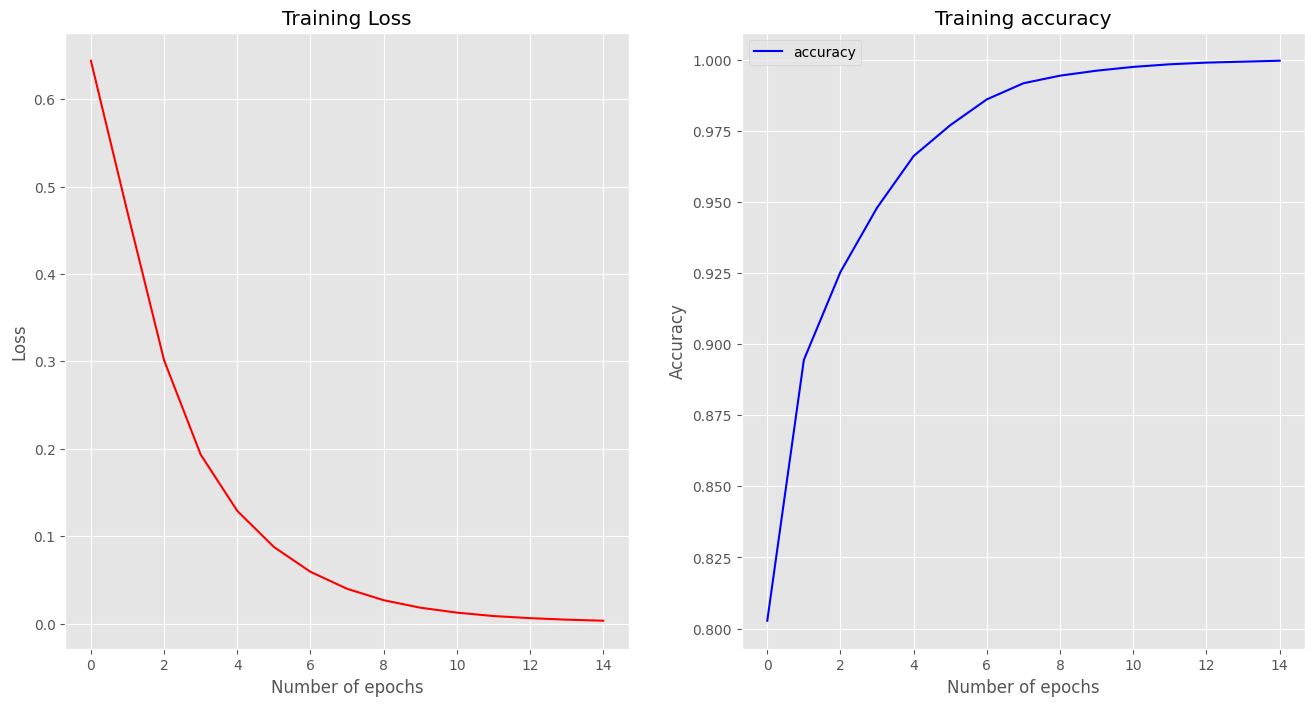

In [120]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],color='r',label='loss')
plt.title('Training Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],color='b',label='accuracy')
plt.title('Training accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [122]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid")) 

In [124]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [126]:
history = model.fit(x_train,y_train, batch_size=100, epochs = 15)

Epoch 1/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7372 - loss: 0.6529
Epoch 2/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9435 - loss: 0.3143
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9825 - loss: 0.1124
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9959 - loss: 0.0449
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9988 - loss: 0.0211
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9997 - loss: 0.0118
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9998 - loss: 0.0076
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 0.0049
Epoch 9/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 10/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 1.0000 - loss: 0.0026
Epoch 11/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 12/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 

In [128]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │     3,547,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,642,421 (40.60 MB)

 Trainable params: 3,547,473 (13.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,094,948 (27.07 MB)

In [130]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test loss:", test_loss)
print("Test accuracy:",test_acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8620 - loss: 0.3876
Test loss: 0.37686294317245483
Test accuracy: 0.8690000176429749


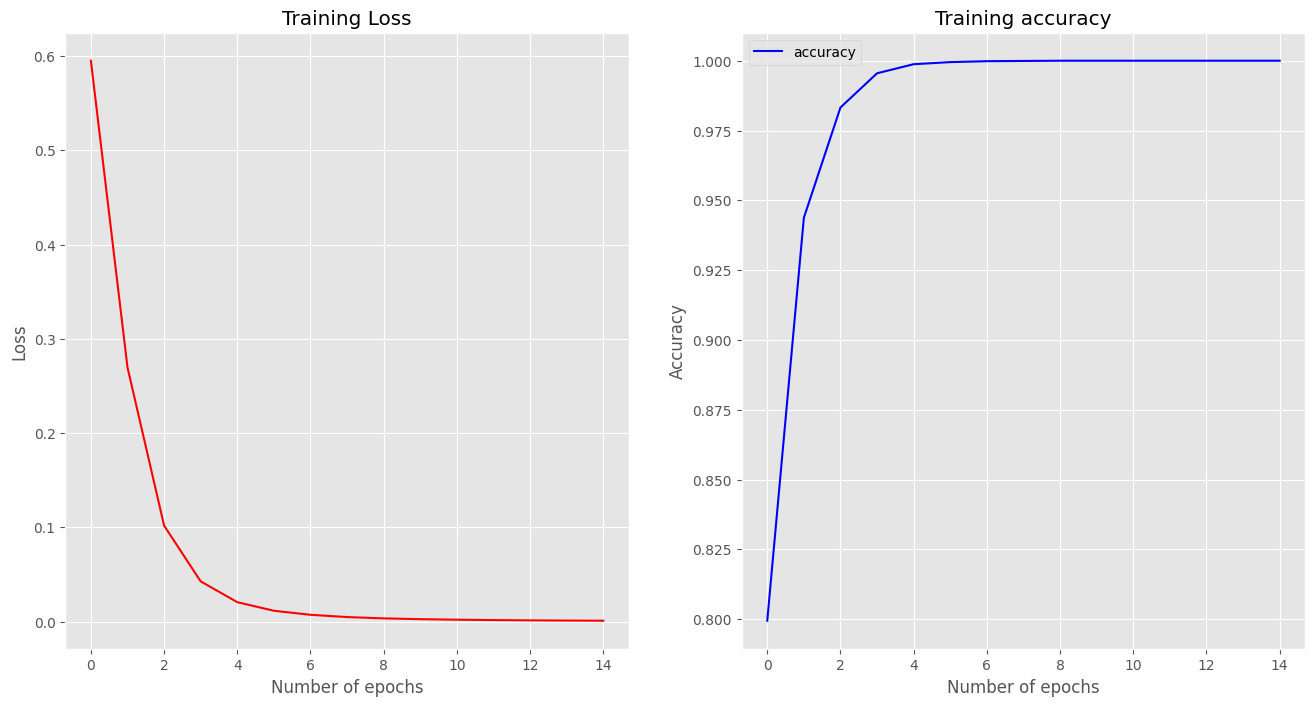

In [132]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],color='r',label='loss')
plt.title('Training Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],color='b',label='accuracy')
plt.title('Training accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()